In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/resemble-ai/Resemblyzer.git

Cloning into 'Resemblyzer'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 595 (delta 2), reused 1 (delta 0), pack-reused 586
Receiving objects: 100% (595/595), 101.46 MiB | 12.12 MiB/s, done.
Resolving deltas: 100% (99/99), done.


In [ ]:
!pip install webrtcvad-wheels

In [ ]:
cd Resemblyzer

/content/Resemblyzer


In [ ]:
from resemblyzer import preprocess_wav, VoiceEncoder
from pathlib import Path
from scipy.io.wavfile import write

#give the file path to your audio file
audio_file_path = '/content/drive/My Drive/Dual Rnn/WhatsApp Audio 2020-07-13 at 8.44.22 PM.wav'
wav_fpath = Path(audio_file_path)

wav = preprocess_wav(wav_fpath)
encoder = VoiceEncoder("cpu")
_, cont_embeds, wav_splits = encoder.embed_utterance(wav, return_partials=True, rate=16)
print(cont_embeds)

write('/content/drive/My Drive/Dual Rnn/WhatsApp Audio 2020-07-13 at 8.44.22 PM.wav', 16000, wav)

Loaded the voice encoder model on cpu in 0.01 seconds.
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.05391316 0.         0.         ... 0.         0.         0.        ]
 [0.08878787 0.         0.         ... 0.         0.         0.        ]
 [0.10824978 0.         0.         ... 0.         0.         0.        ]]


In [ ]:
!pip install kneed


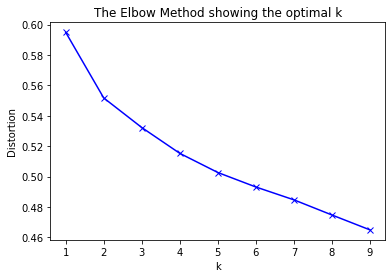

range(1, 10) 
 [0.5949497528632681, 0.5517502945200532, 0.5322969227369116, 0.5153039157187963, 0.5027071179813402, 0.49317828991754514, 0.4847277493818457, 0.47476245368297554, 0.464957463609856]
4


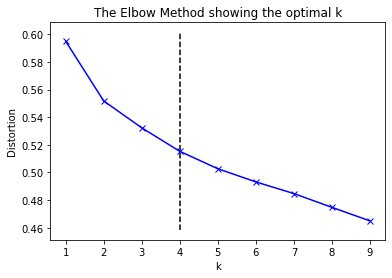

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(cont_embeds)
    kmeanModel.fit(cont_embeds)
    distortions.append(sum(np.min(cdist(cont_embeds, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / cont_embeds.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(K, '\n', distortions)



import sys
sys.path.append('..')
from kneed import KneeLocator
kn = KneeLocator(list(K), distortions, S=1.0, curve='convex', direction='decreasing')
print(kn.knee)


plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.plot(K, distortions, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [ ]:
!pip3 install spectralcluster

In [ ]:
from spectralcluster import SpectralClusterer
c=kn.knee
print(c)
clusterer = SpectralClusterer(
    min_clusters=c,
    max_clusters=100,
    p_percentile=0.90,
    gaussian_blur_sigma=1)

labels = clusterer.predict(cont_embeds)
print(labels)

3
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1]


In [ ]:
# from resemblyzer import sampling_rate
# sr = sampling_rate

def create_labelling(labels,wav_splits):
    from resemblyzer import sampling_rate    
    times = [((s.start + s.stop) / 2) / sampling_rate for s in wav_splits]
    labelling = []
    start_time = 0

    for i,time in enumerate(times):
        if i>0 and labels[i]!=labels[i-1]:
            temp = [str(labels[i-1]),start_time,time]
            labelling.append(tuple(temp))
            start_time = time
        if i==len(times)-1:
            temp = [str(labels[i]),start_time,time]
            labelling.append(tuple(temp))

    return labelling
  
labelling = create_labelling(labels,wav_splits)

In [ ]:
labelling

[('1', 0, 3.38), ('0', 3.38, 4.82), ('2', 4.82, 6.02), ('1', 6.02, 6.44)]

In [ ]:
!pip install pydub
from pydub import AudioSegment

In [ ]:


output = {}
for x, y, z in labelling:
    if x in output:
        output[x].append((y, z))
    else:
        output[x] = [(y, z)]

#keys = []
values = []
items = output.items()
for item in items:
    values.append(item[1])

audio = AudioSegment.from_wav('/content/drive/My Drive/Dual Rnn/WhatsApp Audio 2020-07-13 at 8.44.22 PM.wav')
voices = []
n = 0
for i in values:
    for j in i:
        start_time, stop_time = j
        n += audio[start_time:stop_time]
    voices.append(n)

for i, j in enumerate(voices):
    j.export(f'/content/drive/My Drive/Dual Rnn/voice_{i}.wav')

In [ ]:
#give the file path to your audio file
audio_file_path = '/content/drive/My Drive/Audio/commercial_stereo.wav'
wav_fpath = Path(audio_file_path)

wav = preprocess_wav(wav_fpath)
encoder = VoiceEncoder("cpu")
_, cont_embeds, wav_splits = encoder.embed_utterance(wav, return_partials=True, rate=16)
print(cont_embeds.shape)

Loaded the voice encoder model on cpu in 0.01 seconds.
(361, 256)


In [ ]:
from spectralcluster import SpectralClusterer

clusterer = SpectralClusterer(
    min_clusters=2,
    max_clusters=100,
    p_percentile=0.90,
    gaussian_blur_sigma=1)

labels = clusterer.predict(cont_embeds)

In [ ]:
def create_labelling(labels,wav_splits):
    from resemblyzer import sampling_rate
    times = [((s.start + s.stop) / 2) / sampling_rate for s in wav_splits]
    labelling = []
    start_time = 0

    for i,time in enumerate(times):
        if i>0 and labels[i]!=labels[i-1]:
            temp = [str(labels[i-1]),start_time,time]
            labelling.append(tuple(temp))
            start_time = time
        if i==len(times)-1:
            temp = [str(labels[i]),start_time,time]
            labelling.append(tuple(temp))

    return labelling
  
labelling = create_labelling(labels,wav_splits)

In [ ]:
labelling

[('0', 0, 4.1),
 ('1', 4.1, 8.36),
 ('0', 8.36, 10.1),
 ('1', 10.1, 12.74),
 ('0', 12.74, 15.26),
 ('1', 15.26, 18.74),
 ('0', 18.74, 18.8),
 ('1', 18.8, 22.4)]

In [ ]:

import numpy as np
from scipy.io.wavfile import write

# data = np.random.uniform(-1,1,44100) # 44100 random samples between -1 and 1
# scaled = np.int16(wav/np.max(np.abs(wav)) * 32767)
write('/content/drive/My Drive/Colab Notebooks/stereo.wav', sr, wav)

In [ ]:
from pydub import AudioSegment
audio = AudioSegment.from_wav('/content/drive/My Drive/Colab Notebooks/stereo.wav')

In [ ]:
male_1 = audio[0:4100]  #0, 4.1 
female_1 = audio[4100:8360] #'1', 4.1, 8.36
male_2 = audio[8360: 10100] #'0', 8.36, 10.1
female_2 = audio[10100:12740] #'1', 10.1, 12.74
male_3 = audio[12740:15260] # '0', 12.74, 15.26
female_3 = audio[15260:18740] #'1', 15.26, 18.74
male_4 = audio[18740:18800] #'0', 18.74, 18.8
female_4 = audio[18800:22400] #1', 18.8, 22.4

In [ ]:
speaker_1 = male_1 + male_2 + male_3 + male_4
speaker_2 = female_1 + female_2 + female_3 + female_4

speaker_1.export('/content/drive/My Drive/Colab Notebooks/speaker_1.wav', format = 'wav')
speaker_2.export("/content/drive/My Drive/Colab Notebooks/speaker_2.wav", format = 'wav')

<_io.BufferedRandom name='/content/drive/My Drive/Colab Notebooks/speaker_2.wav'>

In [ ]:
#give the file path to your audio file
audio_file_path = '/content/drive/My Drive/Audio/commercial_mono.wav'
wav_fpath = Path(audio_file_path)

wav = preprocess_wav(wav_fpath)
encoder = VoiceEncoder("cpu")
_, cont_embeds, wav_splits = encoder.embed_utterance(wav, return_partials=True, rate=16)
print(cont_embeds.shape)

In [ ]:
from spectralcluster import SpectralClusterer

clusterer = SpectralClusterer(
    min_clusters=2,
    max_clusters=100,
    p_percentile=0.90,
    gaussian_blur_sigma=1)

labels = clusterer.predict(cont_embeds)

In [ ]:
def create_labelling(labels,wav_splits):
    from resemblyzer import sampling_rate
    times = [((s.start + s.stop) / 2) / sampling_rate for s in wav_splits]
    labelling = []
    start_time = 0

    for i,time in enumerate(times):
        if i>0 and labels[i]!=labels[i-1]:
            temp = [str(labels[i-1]),start_time,time]
            labelling.append(tuple(temp))
            start_time = time
        if i==len(times)-1:
            temp = [str(labels[i]),start_time,time]
            labelling.append(tuple(temp))

    return labelling
  
labelling = create_labelling(labels,wav_splits)

In [ ]:
labelling

In [ ]:
import numpy as np
from scipy.io.wavfile import write

# data = np.random.uniform(-1,1,44100) # 44100 random samples between -1 and 1
# scaled = np.int16(wav/np.max(np.abs(wav)) * 32767)
write('test.wav', 14100, wav)

In [ ]:
from resemblyzer import preprocess_wav, VoiceEncoder
from pathlib import Path

#give the file path to your audio file
audio_file_path = '/content/drive/My Drive/Colab Notebooks/1.wav'
wav_fpath = Path(audio_file_path)

wav = preprocess_wav(wav_fpath)
encoder = VoiceEncoder("cuda")
a, cont_embeds, wav_splits = encoder.embed_utterance(wav, return_partials=True, rate=16)
print(cont_embeds.shape)



Loaded the voice encoder model on cuda in 0.02 seconds.
(367, 256)


In [ ]:
from spectralcluster import SpectralClusterer

clusterer = SpectralClusterer(
    min_clusters=3,
    max_clusters=100,
    p_percentile=0.90,
    gaussian_blur_sigma=1)

labels = clusterer.predict(cont_embeds)
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
def create_labelling(labels,wav_splits):
    from resemblyzer import sampling_rate
    times = [((s.start + s.stop) / 2) / sampling_rate for s in wav_splits]
    labelling = []
    start_time = 0

    for i,time in enumerate(times):
        if i>0 and labels[i]!=labels[i-1]:
            temp = [(labels[i-1]),start_time,time]
            labelling.append(tuple(temp))
            start_time = time
        if i==len(times)-1:
            temp = [(labels[i]),start_time,time]
            labelling.append(tuple(temp))

    return labelling
  
labelling = create_labelling(labels,wav_splits)

In [ ]:
labelling

[(2, 0, 3.44),
 (1, 3.44, 9.74),
 (0, 9.74, 12.8),
 (1, 12.8, 12.98),
 (0, 12.98, 13.1),
 (2, 13.1, 13.58),
 (0, 13.58, 16.28),
 (2, 16.28, 18.98),
 (0, 18.98, 22.76)]

In [ ]:
from resemblyzer import sampling_rate


In [ ]:
sr = sampling_rate

In [ ]:

import numpy as np
from scipy.io.wavfile import write

# data = np.random.uniform(-1,1,44100) # 44100 random samples between -1 and 1
# scaled = np.int16(wav/np.max(np.abs(wav)) * 32767)
write('/content/drive/My Drive/Colab Notebooks/mine.wav', sr, wav)

In [ ]:
from pydub import AudioSegment
audio = AudioSegment.from_wav('/content/drive/My Drive/Colab Notebooks/mine.wav')

In [ ]:
murali_1 = audio[0:3440] #0, 3.44
murali_2 = audio[13100:13580] # 13.1, 13.58
murali_3 = audio[16280:18980] # 16.28, 18.98
praveen_1 = audio[3440:9740] #  3.44, 9.74
praveen_2 = audio[12800:12980] # 12.8, 12.98
prabu_1 = audio[9740:12800] # 9.74, 12.8
prabu_2 = audio[12980:13100] # 12.98, 13.1 
prabu_3 = audio[13580:16280] #13.58, 16.28
prabu_4 = audio[18980:22760] #18.98, 22.76

In [ ]:
murali = murali_1 + murali_2 + murali_3
praveen = praveen_1 + praveen_2
prabu = prabu_1 + prabu_2 + prabu_3 + prabu_4

In [ ]:
murali.export('/content/drive/My Drive/Colab Notebooks/murali.wav', format='wav')
praveen.export('/content/drive/My Drive/Colab Notebooks/praveen.wav', format='wav')
prabu.export('/content/drive/My Drive/Colab Notebooks/prabu.wav', format='wav')

<_io.BufferedRandom name='/content/drive/My Drive/Colab Notebooks/prabu.wav'>

In [ ]:
labelling

In [ ]:
for i in labelling:
  print(i)

In [ ]:
pip install git+https://github.com/jiaaro/pydub.git@master

  Cloning https://github.com/jiaaro/pydub.git (to revision master) to /tmp/pip-req-build-mas_cpv7
  Running command git clone -q https://github.com/jiaaro/pydub.git /tmp/pip-req-build-mas_cpv7
  Created wheel for pydub: filename=pydub-0.24.1-py2.py3-none-any.whl size=30882 sha256=fd21516763eac645a2993f80c7f8b7582fff627b4bed4144e31bd92355c8b6ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-bdsx67ji/wheels/21/42/ed/000068980b52206c1f0fe8ca178cc01a7e094e366bc2cfb2e8
Successfully built pydub


In [ ]:
from pydub import AudioSegment

def slicing(start_time, stop_time, audio_path):
  audio = AudioSegment.from_wav(audio_path)
  start_time *= 1000
  stop_time *= 1000
  result = audio[start_time : stop_time]
  
  




In [ ]:
output = {}
for x, y, z in labelling: 
    if x in output: 
        output[x].append((y, z)) 
    else: 
        output[x] = [(y, z)] 

In [ ]:
import numpy as np
from scipy.io.wavfile import write

# data = np.random.uniform(-1,1,44100) # 44100 random samples between -1 and 1
# scaled = np.int16(wav/np.max(np.abs(wav)) * 32767)
write('test.wav', 14100, wav)

In [ ]:
from pydub import AudioSegment

In [ ]:
from scipy.io.wavfile import write
import numpy as np
samplerate = 44100; fs = 100
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)
write("example.wav", samplerate, data)

In [ ]:
!pip install audio2numpy

In [ ]:
!sudo apt-get install ffmpeg

In [ ]:
from audio2numpy import open_audio
fp = "/content/drive/My Drive/Colab Notebooks/1.wav"  # change to the correct path to your file accordingly
signal, sampling_rate = open_audio(fp)

In [ ]:
signal

In [ ]:

import numpy as np
from scipy.io.wavfile import write

# data = np.random.uniform(-1,1,44100) # 44100 random samples between -1 and 1
# scaled = np.int16(wav/np.max(np.abs(wav)) * 32767)
write('mono.wav', 16000, wav)